# CREDIT CARD FRAUD DETECTION

In [1]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier 

In [2]:
train_data = pd.read_csv(r"E:\DATA-SCIENCE\Project\CODSOFT\creditcard_data\fraudTrain.csv")

In [3]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [18]:
train_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [4]:
np.unique(train_data['category'])

array(['entertainment', 'food_dining', 'gas_transport', 'grocery_net',
       'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net',
       'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos',
       'travel'], dtype=object)

In [5]:
np.unique(train_data['gender'])

array(['F', 'M'], dtype=object)

In [8]:
#np.unique(train_data['job'])

In [9]:
np.unique(train_data['is_fraud'])

array([0, 1], dtype=int64)

In [10]:
collections.Counter(train_data['is_fraud'])    

Counter({0: 1289169, 1: 7506})

In [16]:
train_data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [3]:
test_data = pd.read_csv(r"E:\DATA-SCIENCE\Project\CODSOFT\creditcard_data\fraudTest.csv")

In [18]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [20]:
test_data['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

**Data Cleaning**

In [21]:
#Missing value check on train data 
train_data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [22]:
#Missing value on test data
test_data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

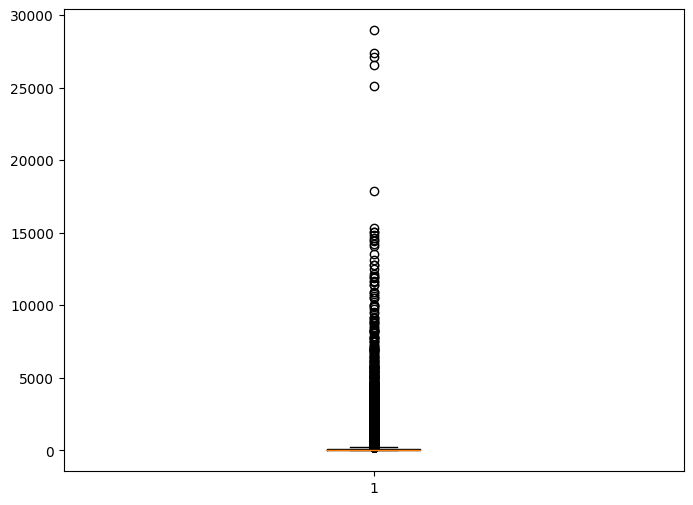

In [32]:
#Box plot for detecting the outliers in amt column
plt.figure(figsize=(8,6))
plt.boxplot(train_data['amt'])
plt.show()

In [28]:
train_data['amt'].mean()

70.35103545607033

In [29]:
train_data['amt'].median()

47.52

In [33]:
train_data['amt'].std()

160.31603857152774

<Axes: xlabel='amt', ylabel='Count'>

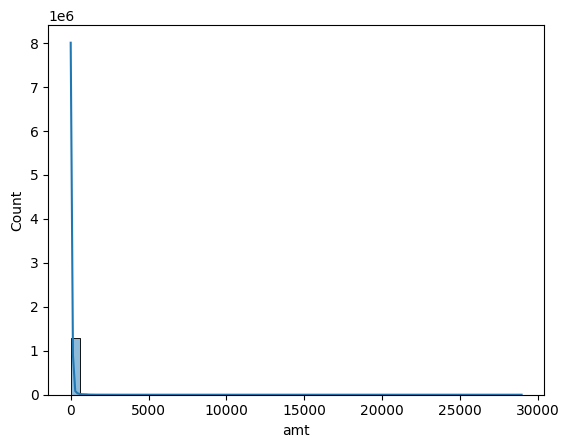

In [34]:
sns.histplot(train_data['amt'],bins=50,kde=True)

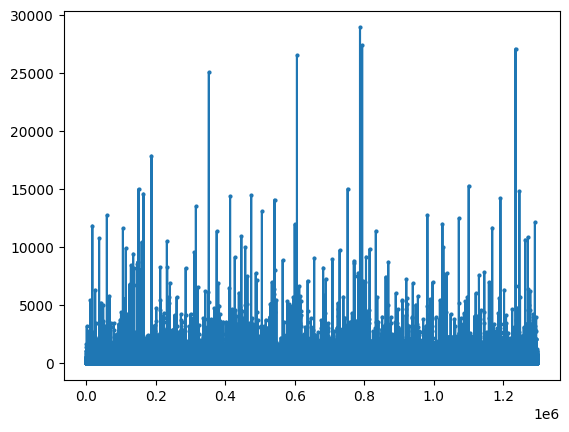

In [37]:
plt.plot(train_data['amt'],linestyle="-",marker='o',markersize=2)

In [4]:
average_amount_by_category = train_data.groupby('category').agg({'amt':'mean'}).reset_index()

In [5]:
print(average_amount_by_category.sort_values(by='amt',ascending=False))

          category         amt
4      grocery_pos  116.960986
13          travel  111.504720
11    shopping_net   88.424076
8         misc_net   80.865095
12    shopping_pos   79.779155
0    entertainment   64.210421
2    gas_transport   63.434572
9         misc_pos   62.890999
6             home   58.270139
7        kids_pets   57.536871
5   health_fitness   54.182140
3      grocery_net   53.670084
1      food_dining   51.086905
10   personal_care   47.967678


**Data Encoding**

In [6]:
#Binary Encoding for Gender on Train data
train_data['gender'] = train_data['gender'].map({'F':0,'M':1})

In [7]:
test_data['gender'] = test_data['gender'].map({'F':0,'M':1}) 

In [8]:
train_data['gender'].value_counts()

gender
0    709863
1    586812
Name: count, dtype: int64

In [9]:
train_data['gender'].value_counts()

gender
0    709863
1    586812
Name: count, dtype: int64

In [123]:
test_data['gender'].value_counts()

gender
0    304886
1    250833
Name: count, dtype: int64

In [10]:
#One hot encoding for category on TRAIN DATA
encode = OneHotEncoder()
train_encoded_category = encode.fit_transform(train_data[['category']])

In [11]:
train_encoded_category_df = pd.DataFrame(train_encoded_category.toarray(),columns=encode.get_feature_names_out(['category']))

In [12]:
train_encoded_category_df = train_encoded_category_df.astype('int')

In [13]:
train_encoded_category_df

,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1296671,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1296672,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1296673,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
#update inside the orignal dataframe
train_data = pd.concat([train_data,train_encoded_category_df],axis=1)

In [91]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0,561 Perry Cove,...,0,0,0,0,1,0,0,0,0,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,...,1,0,0,0,0,0,0,0,0,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,1,594 White Dale Suite 530,...,0,0,0,0,0,0,0,0,0,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,...,0,0,0,0,0,0,0,0,0,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,1,408 Bradley Rest,...,0,0,0,0,0,1,0,0,0,0


In [92]:
#Selection of data for classification 
train_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel'],
      dtype='object')

In [15]:
#ONEHOT ENCODING ON [TEST DATA]
test_encoded_category = encode.fit_transform(test_data[['category']])
test_encoded_category_df = pd.DataFrame(test_encoded_category.toarray(),columns=encode.get_feature_names_out(['category']))
test_encoded_category_df = test_encoded_category_df.astype('int')
test_data = pd.concat([test_data,test_encoded_category_df],axis=1)

In [126]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,1,351 Darlene Green,...,0,0,0,0,0,0,1,0,0,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,0,3638 Marsh Union,...,0,0,0,0,0,0,1,0,0,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,0,9333 Valentine Point,...,0,1,0,0,0,0,0,0,0,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,1,32941 Krystal Mill Apt. 552,...,0,0,0,0,0,1,0,0,0,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,1,5783 Evan Roads Apt. 465,...,0,0,0,0,0,0,0,0,0,1


In [73]:
#DATA SELECTION FOR [TRAIN DATA]
column_input = ['amt','gender','category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel']
X = train_data.loc[:,column_input]
y = train_data.loc[:,'is_fraud'].values

In [94]:
X

,amt,gender,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1296671,51.70,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1296672,105.93,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1296673,74.90,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Model [Logistic Regression]**

In [18]:
#logistic Regression for classification 
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X,y)

LogisticRegression(max_iter=1000)

In [19]:
#On train data prediction 
pred_train_data = logistic_model.predict(X)
print(pred_train_data)
accuracy_on_train_data = accuracy_score(y,pred_train_data)*100
print("Accuracy on Train data: {:.2f}%".format(accuracy_on_train_data))

[0 0 0 ... 0 0 0]
Accuracy on Train data: 99.37%


In [21]:
#DATA SELECTION FOR [TEST DATA]
column_input_test = ['amt','gender','category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel']
X_test = test_data.loc[:,column_input]
y_test = test_data.loc[:,'is_fraud'].values

In [22]:
#Accuracy on test data 
pred_test_data = logistic_model.predict(X_test)
print(pred_test_data)
accuracy_on_test_data = accuracy_score(y_test,pred_test_data)*100
print("Accuracy score on test data: {:.2f}%".format(accuracy_on_test_data))

[0 0 0 ... 0 0 0]
Accuracy score on test data: 99.56%


In [143]:
#Confusion Matrix
cm = confusion_matrix(y_test,pred_test_data)
print("Confusion Matrix")
print("="*60)
print(cm)
print("Classification Report")
print("-"*60)
cr = classification_report(y_test,pred_test_data)
print(cr)

"""Here we can see our precision and recall score for class 1 is ZERO(TRUE POSITIVE),
means the model not predicted 1 instance out of all intances()"""

Confusion Matrix
[[553248    326]
 [  2145      0]]
Classification Report
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [23]:
preci = precision_score(y_test,pred_test_data)

In [24]:
preci

0.0

In [155]:
collections.Counter(y_test)

Counter({0: 553574, 1: 2145})

In [184]:
collections.Counter(pred_test_data)

Counter({0: 555393, 1: 326})

In [119]:
f = X_test.loc[test_data['is_fraud'] == 1]

In [26]:
#Let we test on unseen data
unseen = logistic_model.predict([[24.84,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]])

C:\Users\Tejas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [27]:
unseen[0] #here we can see the model is predicted wrong output | the result should be 1 but predicted as 0 

0

In [74]:
#Let we only select the amount and gender 
X_new = train_data.loc[:,['amt','gender']]
logistic_model_2 = LogisticRegression(max_iter=200).fit(X_new,y)
#on train data prediction 
pred_2_train_data = logistic_model_2.predict(X_new)
accuracy_on_train_data_2 = accuracy_score(y,pred_2_train_data)
print(accuracy_on_train_data_2)

0.9936475986658183


In [75]:
X_test_new = test_data.loc[:,['amt','gender']]
y_test_new = test_data.loc[:,'is_fraud']

In [30]:
pred_2_test_data = logistic_model_2.predict(X_test_new)
accuracy_on_test_data_2 = accuracy_score(y_test_new,pred_2_test_data)
print(accuracy_on_test_data_2)

0.9955013235106231


In [31]:
cm2 = confusion_matrix(y_test_new,pred_2_test_data)
print(cm2) #Still there is model not predicted for 1 


[[553219    355]
 [  2145      0]]


**Conclusion :**
5532219 are detected as not fruad[0] | True Negative 
355 are detected as fruad[1] which is not fraud negative[0] | Flase Positive
2145 are detected as Not fruad[0] which are actually fruad[1] | False Negative 
0 are detected as Fruad | True Positive 

In [63]:
#now we use feature scaling 
scaler = StandardScaler()
X_new['amt'] = scaler.fit_transform(X_new[['amt']])
X_test_new['amt'] = scaler.transform(X_test_new[['amt']])

In [42]:
X_test_new.head()

,amt,gender
0,-0.420988,1
1,-0.252695,0
2,-0.181336,0
3,-0.064255,1
4,-0.418929,1


In [64]:
X_new.head()

,amt,gender
0,-0.407826,0
1,0.230039,0
2,0.934149,1
3,-0.158132,1
4,-0.177094,1


In [44]:
logistic_model_scaler = LogisticRegression(max_iter=1000).fit(X_new,y) 

In [45]:
pred_test_scaler = logistic_model_scaler.predict(X_test_new)

In [46]:
pred_test_scaler

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
accuracy_on_scaler = accuracy_score(y_test_new,pred_test_scaler)

In [48]:
print(accuracy_on_scaler)

0.9955013235106231


In [49]:
cm_scaler = confusion_matrix(y_test_new,pred_test_scaler)

In [50]:
cf_scaler = classification_report(y_test,pred_test_scaler)

In [51]:
print(cm_scaler)

[[553219    355]
 [  2145      0]]


In [52]:
print(cf_scaler)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [53]:
collections.Counter(pred_test_scaler)

Counter({0: 555364, 1: 355})

**SMOTE (Synthetic Minority Over-sampling Technique):**

In [76]:
#we have imbalance data that why we use SMOTE that take the over sampling for minority 
#balace the data SMOTE is used and special for FRAUD DETECTION
smote = SMOTE()
X_smote,y_smote = smote.fit_resample(X_new,y)

In [77]:
X_smote

,amt,gender
0,4.970000,0
1,107.230000,0
2,220.110000,1
3,45.000000,1
4,41.960000,1
...,...,...
2578333,936.650943,0
2578334,774.768391,0
2578335,951.820226,1
2578336,860.309339,0


In [78]:
model_smote = LogisticRegression(max_iter=200).fit(X_smote,y_smote)

In [79]:
pred_smote = model_smote.predict(X_test_new)

In [80]:
cm_smote = confusion_matrix(y_test,pred_smote)

In [81]:
print(cm_smote)

[[526831  26743]
 [   532   1613]]


In [82]:
accuracy_on_smote = accuracy_score(y_test,pred_smote)*100
print(accuracy_on_smote)

95.09194395008988


In [83]:
cf_smote = classification_report(y_test_new,pred_smote)
print(cf_smote)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.06      0.75      0.11      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.85      0.54    555719
weighted avg       1.00      0.95      0.97    555719



**Decision Tree**

In [86]:
decision_tree = DecisionTreeClassifier(random_state=42).fit(X_new,y)

In [88]:
pred_decision_tree = decision_tree.predict(X_test_new)

In [89]:
print(pred_decision_tree)

[0 0 0 ... 0 0 0]


In [101]:
accuracy_decision = accuracy_score(y_test,pred_decision_tree)*100

In [102]:
print("Accuracy score on test data :{:.2f}%".format(accuracy_decision))

Accuracy score on test data :99.49%


In [92]:
cm_decision = confusion_matrix(y_test,pred_decision_tree)
print(cm_decision)

[[552322   1252]
 [  1567    578]]


In [93]:
cf_decision = classification_report(y_test,pred_decision_tree)
print(cf_decision)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.32      0.27      0.29      2145

    accuracy                           0.99    555719
   macro avg       0.66      0.63      0.64    555719
weighted avg       0.99      0.99      0.99    555719



In [100]:
collections.Counter(pred_decision_tree)

Counter({0: 553889, 1: 1830})

**Random Forest**

In [104]:
r_forest = RandomForestClassifier(random_state=42).fit(X_new,y)

In [105]:
pred_random_forest = r_forest.predict(X_test_new)

In [106]:
print(pred_random_forest)

[0 0 0 ... 0 0 0]


In [108]:
accuracy_on_decision = accuracy_score(y_test,pred_random_forest)*100
print("Accuracy test on test data :{:.2f}%".format(accuracy_on_decision))

Accuracy test on test data :99.49%


In [109]:
cm_random = confusion_matrix(y_test,pred_random_forest)
print(cm_random)

[[552267   1307]
 [  1553    592]]


In [110]:
cf_random = classification_report(y_test,pred_random_forest)
print(cf_random)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.31      0.28      0.29      2145

    accuracy                           0.99    555719
   macro avg       0.65      0.64      0.65    555719
weighted avg       0.99      0.99      0.99    555719



CONCLUSION : 
Decision Tree and Random forest working fine with the test data and giving much better accuracy, precision and recall score ):

In [140]:
#Let check on unseen or new data 
#NOTE : gender{Female:0 and Male:1}
amount_unseen = 1078
gender_unseen = 1      
unseen_random_df = pd.DataFrame([[amount_unseen,gender_unseen]],columns=X_test_new.columns)
unseen_random = r_forest.predict(unseen_random_df)
gender_str = "Male" if gender_unseen == 1 else "Female"
if unseen_random[0] == 0:
    print(f"Amount ${amount_unseen} and Gender: {gender_str}: is fraudulent")
else:
    print(f"Amount ${amount_unseen} and Gender: {gender_str} is legitimate.")


Amount $1078 and Gender: Male is legitimate.
